### Problem Statment

#### 
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset contains around 40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset

### Importing libraries

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm

### Loading the data

In [3]:
data = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

### Shape of the data

In [4]:
data.shape

(3998, 39)

##### Data has 3998 data points and 39 columns

### Checking head of the data

In [5]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Information of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

### Checking five point summary of the data

In [7]:
data.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


### Checking missing values

In [8]:
data.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

##### There are no missing values present in the data.

### Checking duplicate values

In [9]:
data.duplicated().sum()

0

###### There are no duplicate values are present in the data.

### Deleting unwanted column

In [10]:
data["Unnamed: 0"].nunique()

1

In [11]:
data = data.drop(columns = ['Unnamed: 0'])

In [12]:
data.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### checking columns in the data

In [13]:
data.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

### Unique values of the each feature

In [14]:
data.nunique(axis=0)

ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg                  23
conscienti

# Univariate Analysis

### 'salary'

<AxesSubplot:xlabel='Salary', ylabel='Density'>

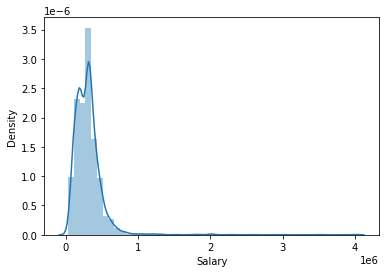

In [15]:
sns.distplot(data['Salary'])

##### Salary feature showing some normal distribution with right skewness.

##### Before removing outliers

<AxesSubplot:xlabel='Salary'>

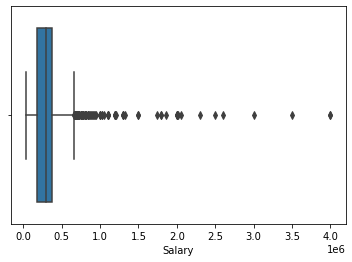

In [16]:
sns.boxplot(data['Salary'])

##### Salary feature has outliers present in the data.

### Removing outliers

In [17]:
Q1 = np.percentile(data['Salary'], 25)
Q3 = np.percentile(data['Salary'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [18]:
data['Salary'] = data['Salary'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

#### After removing outliers

<AxesSubplot:xlabel='Salary'>

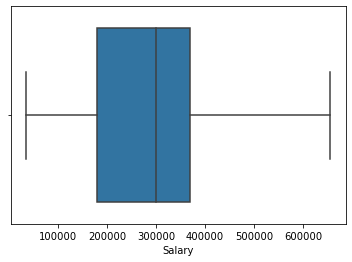

In [19]:
sns.boxplot(data["Salary"])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

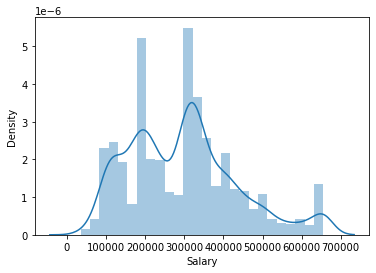

In [20]:
sns.distplot(data["Salary"])

##### From the above graph we can observe that outlers are removed from the feature.

### DOJ

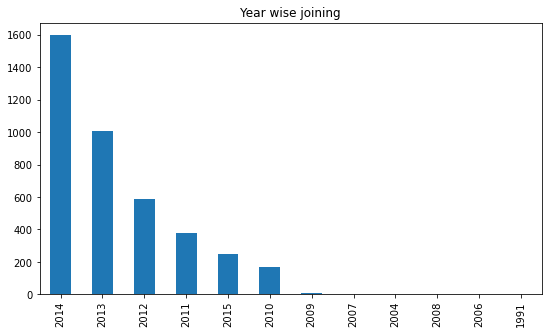

In [291]:
plt.figure(figsize=(9,5))
plt.title('Year wise joining')
(data['DOJ'].dt.year).value_counts().plot(kind='bar');

#### Majority candidates are joined between 2010 and 2014 

### DOB

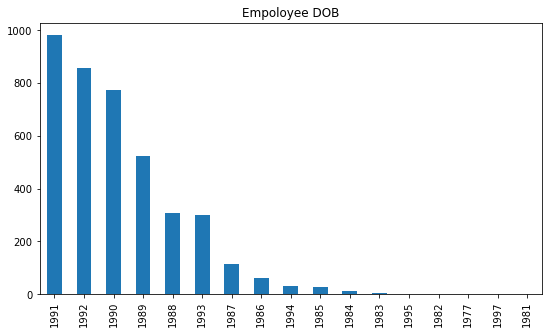

In [293]:
plt.figure(figsize=(9,5))
plt.title('Empoloyee DOB')
(data['DOB'].dt.year).value_counts().plot(kind='bar'); 

#### Highest number of candidates from 1991 and majaority candiadates are between 1986 and 1991.
* Highest candidates are young as per the graph.

### 'Designation'

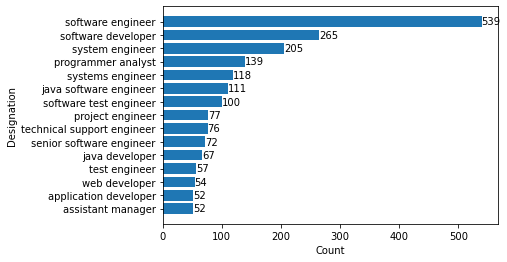

<Figure size 1440x504 with 0 Axes>

In [22]:
#fig = plt.figure(figsize = (20, 7))
top_15_job_cities = data['Designation'].value_counts().nlargest(15)

# Plot the top 15 job cities using a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top_15_job_cities.index, top_15_job_cities.values)
ax.set_xlabel("Count")
ax.set_ylabel("Designation")
ax.bar_label(ax.containers[0])
ax.invert_yaxis()
plt.figure(figsize = (20, 7))
plt.show()

##### The above 'Designations' are the top 15 among the remaing roles.This graph represents top 15 designations with corresponding frequency of roles.
* software engineer, Software developer and system engineer are the top 3 designations.


### 'JobCity'

In [23]:
data.groupby(['JobCity'])["JobCity"].sum()

JobCity
-1                              -461
 Chennai                     Chennai
 Delhi                         Delhi
 Mumbai                Mumbai Mumbai
 Pune                           Pune
                        ...         
trivandrum      trivandrumtrivandrum
udaipur               udaipurudaipur
vapi                            vapi
vizag                          vizag
vsakhapttnam            vsakhapttnam
Name: JobCity, Length: 339, dtype: object

In [24]:
data1 = data[data["JobCity"] != -1]

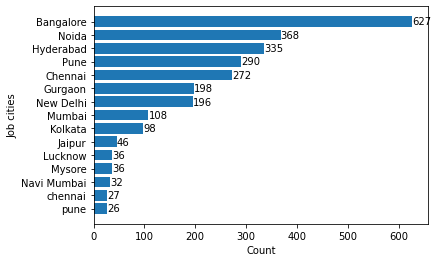

<Figure size 1440x504 with 0 Axes>

In [25]:

top_15_job_citi = data1['JobCity'].value_counts().nlargest(15)

# Plfig = plt.figure(figsize = (20, 7))ot the top 15 job cities using a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top_15_job_citi.index, top_15_job_citi.values)
ax.set_xlabel("Count")
ax.set_ylabel("Job cities")
ax.bar_label(ax.containers[0])
ax.invert_yaxis()
plt.figure(figsize = (20, 7))
plt.show()

##### The above plot describing the top 15 jobcities with their frquencies.
* Bangalore, Noida and Hyderabad are the top 3 Jobcities.

### 'Gender'

[Text(0, 0, '957'), Text(0, 0, '3041')]

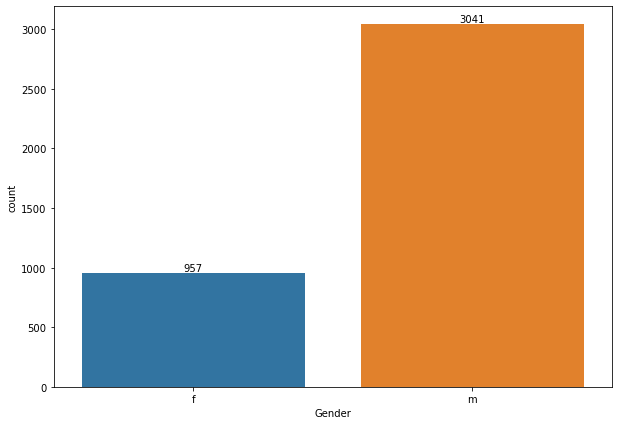

In [26]:
fig = plt.figure(figsize = (10, 7))
ax=sns.countplot(data['Gender'])
ax.bar_label(ax.containers[0])

#### There are 957 female and 3041 male candindates are there in the given data.

### 10percentage

<AxesSubplot:xlabel='10percentage', ylabel='Density'>

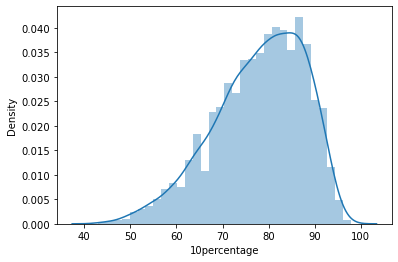

In [27]:
sns.distplot(data['10percentage'])

##### showing normal distribution with left skewness

<AxesSubplot:xlabel='10percentage'>

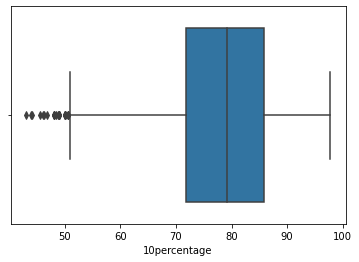

In [28]:
sns.boxplot(data1['10percentage'])

##### There are outliers present in the data

### Removing outliers

In [29]:
Q1 = np.percentile(data1['10percentage'], 25)
Q3 = np.percentile(data1['10percentage'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [30]:
data1['10percentage'] = data1['10percentage'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='10percentage'>

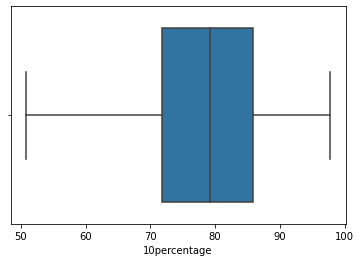

In [31]:
sns.boxplot(data1['10percentage'])

##### The above plot is after outliers are removed form the 10percentage  feature.

### 12graduation

<AxesSubplot:xlabel='12graduation', ylabel='Density'>

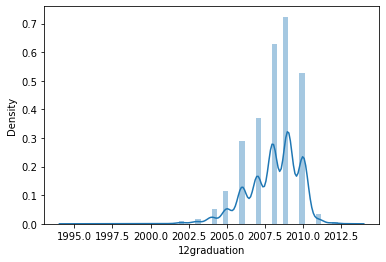

In [32]:
sns.distplot(data1["12graduation"])

##### The above plot not showing normal distribution.

<AxesSubplot:xlabel='12graduation'>

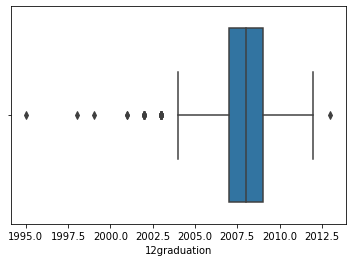

In [33]:
sns.boxplot(data1["12graduation"])

##### There are outliers present in the data

### Removing outliers

In [34]:
Q1 = np.percentile(data1['12graduation'], 25)
Q3 = np.percentile(data1['12graduation'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [35]:
data1['12graduation'] = data1['12graduation'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='12graduation'>

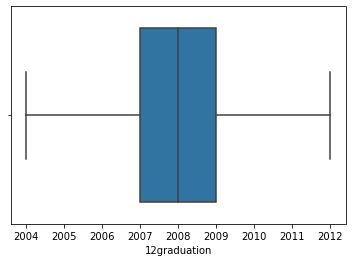

In [36]:
sns.boxplot(data1["12graduation"])

##### The above plot is after removal of outliers from the 12graduation feature.

### 12percentage

<AxesSubplot:xlabel='12percentage', ylabel='Density'>

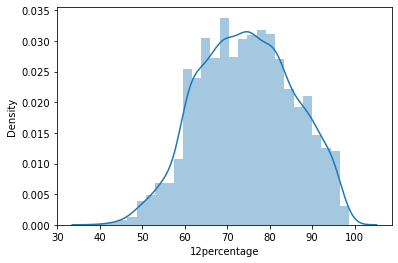

In [37]:
sns.distplot(data1["12percentage"])

#### 12percentage showing noraml distribution

<AxesSubplot:xlabel='12percentage'>

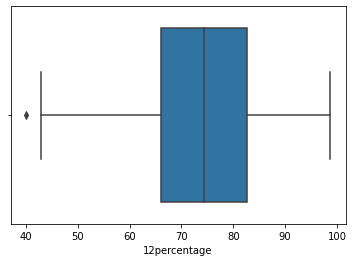

In [38]:
sns.boxplot(data1["12percentage"])

##### 12percentage have some outliers present

### Removing outliers

In [39]:
Q1 = np.percentile(data1['12percentage'], 25)
Q3 = np.percentile(data1['12percentage'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [40]:
data1['12percentage'] = data1['12percentage'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='12percentage'>

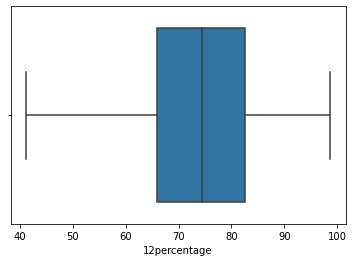

In [41]:
sns.boxplot(data1['12percentage'])


######  The above plot is after removal of outliers in the 12percentage data.

### 12board

In [42]:
data1 = data[data["12board"] != 0]

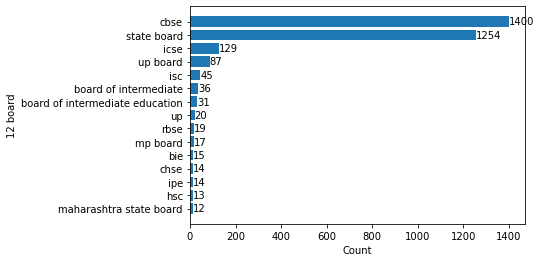

<Figure size 1440x504 with 0 Axes>

In [43]:
top_15_12board= data1['12board'].value_counts().nlargest(15)

# Plfig = plt.figure(figsize = (20, 7))ot the top 15 job cities using a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top_15_12board.index, top_15_12board.values)
ax.set_xlabel("Count")
ax.set_ylabel("12 board")
ax.bar_label(ax.containers[0])
ax.invert_yaxis()
plt.figure(figsize = (20, 7))
plt.show()

##### The above plot is the top 15 , 12 board syllabuses. cbse, state board, icse are the top 3 12 boards

### CollegeID  

<AxesSubplot:xlabel='CollegeID', ylabel='Density'>

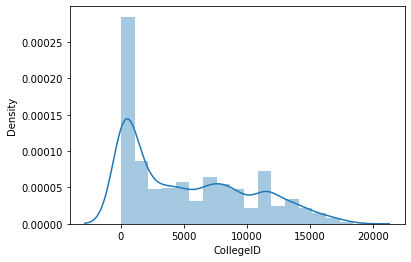

In [44]:
sns.distplot(data1["CollegeID"])

#### The CollegeID is not showing normal distribution.   Showing right skewness

<AxesSubplot:xlabel='CollegeID'>

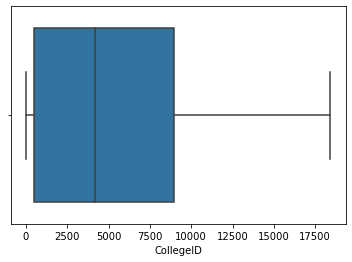

In [45]:
sns.boxplot(data1["CollegeID"])

##### There are no outliers present in the CollegeID data.

### CollegeTier

<AxesSubplot:xlabel='CollegeTier', ylabel='Density'>

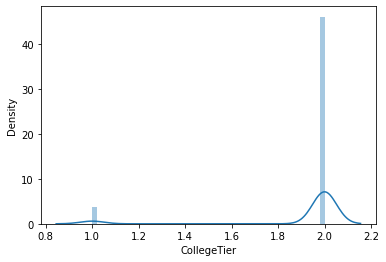

In [46]:
sns.distplot(data1["CollegeTier"])

##### CollegeTier is not showing normal distribution.

<AxesSubplot:xlabel='CollegeTier'>

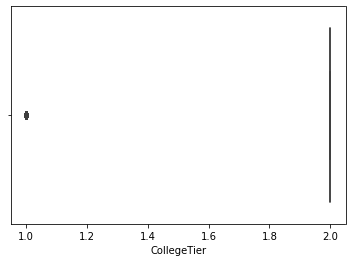

In [47]:
sns.boxplot(data1["CollegeTier"])

##### There are outliers present in the data.

### Removing outliers

In [48]:
Q1 = np.percentile(data1['CollegeTier'], 25)
Q3 = np.percentile(data1['CollegeTier'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [49]:
data1['CollegeTier'] = data1['CollegeTier'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='CollegeTier'>

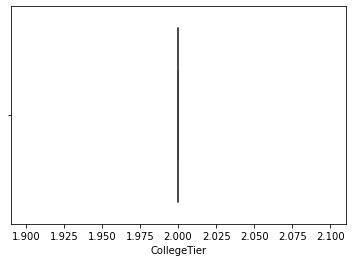

In [50]:
sns.boxplot(data1["CollegeTier"])

##### the above plot is after removal of outliers in the CollegeTier data. 

### Degree

[Text(0, 0, '3700'), Text(0, 0, '243'), Text(0, 0, '53'), Text(0, 0, '2')]

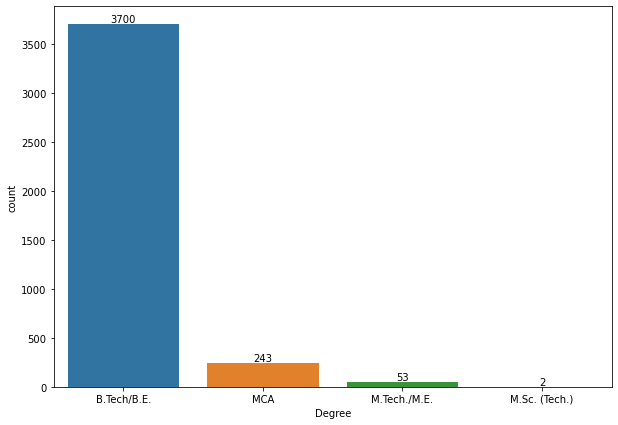

In [51]:
fig = plt.figure(figsize = (10, 7))
ax=sns.countplot(data['Degree'])
ax.bar_label(ax.containers[0])

##### In the give data, B.tech/b.e candidates are 3700 , MCA candidates are 243, M.tech/M.e candidates are 53 and M.Sc candidates are 2.

### Specialization

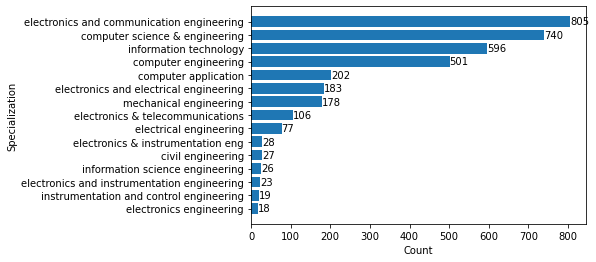

<Figure size 1440x504 with 0 Axes>

In [52]:
top_15_Specialization= data1['Specialization'].value_counts().nlargest(15)

# Plfig = plt.figure(figsize = (20, 7))ot the top 15 job cities using a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top_15_Specialization.index, top_15_Specialization.values)
ax.set_xlabel("Count")
ax.set_ylabel("Specialization")
ax.bar_label(ax.containers[0])
ax.invert_yaxis()
plt.figure(figsize = (20, 7))
plt.show()

##### The above plot represents the top 15 Specialization with their frequencies. 
* elcetronics and communication engineering, computer science and engineering, information technology are the top 3 Specializations.

### collegeGPA

<AxesSubplot:xlabel='collegeGPA', ylabel='Density'>

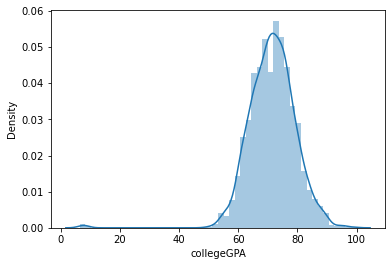

In [53]:
sns.distplot(data1["collegeGPA"])

##### showing normal distribution with left skewness.

<AxesSubplot:xlabel='collegeGPA'>

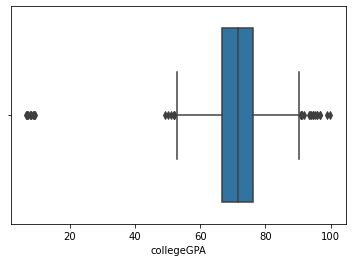

In [54]:
sns.boxplot(data1['collegeGPA'])

##### There are outliers present in the data.

### CollegeCityID

<AxesSubplot:xlabel='CollegeCityID', ylabel='Density'>

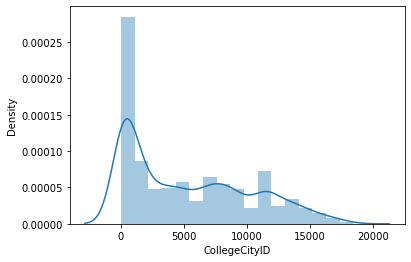

In [55]:
sns.distplot(data1['CollegeCityID'])

##### The above plot not showing normal distribution.

<AxesSubplot:xlabel='CollegeCityID'>

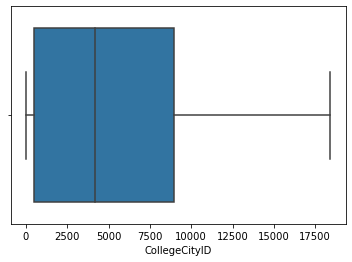

In [56]:
sns.boxplot(data1["CollegeCityID"])

##### CollegeCityID not having outliers in the data.

### CollegeCityTier

<AxesSubplot:xlabel='CollegeCityTier', ylabel='Density'>

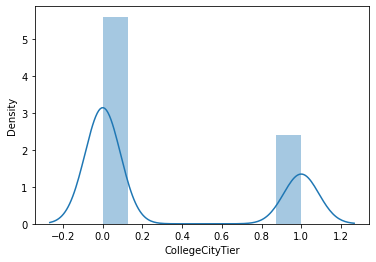

In [57]:
sns.distplot(data1["CollegeCityTier"])

##### The above grpah showing bimodal distribution.

<AxesSubplot:xlabel='CollegeCityTier'>

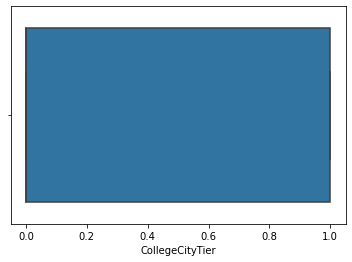

In [58]:
sns.boxplot(data1["CollegeCityTier"])

##### CollegeCityTier doesnot having outliers present in the data.

### CollegeState

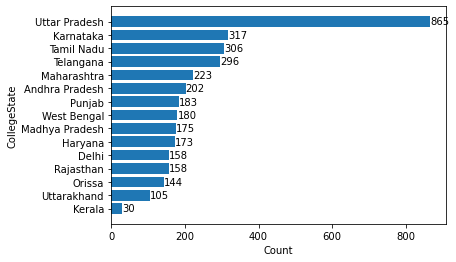

<Figure size 1440x504 with 0 Axes>

In [59]:
top_15_CollegeState= data1['CollegeState'].value_counts().nlargest(15)

# Plfig = plt.figure(figsize = (20, 7))ot the top 15 job cities using a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top_15_CollegeState.index, top_15_CollegeState.values)
ax.set_xlabel("Count")
ax.set_ylabel("CollegeState")
ax.bar_label(ax.containers[0])
ax.invert_yaxis()
plt.figure(figsize = (20, 7))
plt.show()

##### The above graph showing the top 15 CollegeState with their corresponding frequencies.
* Utter Pradesh, karnataka and tamilnadu are the top 3 CollegeStates

### GraduationYear

<AxesSubplot:xlabel='GraduationYear', ylabel='Density'>

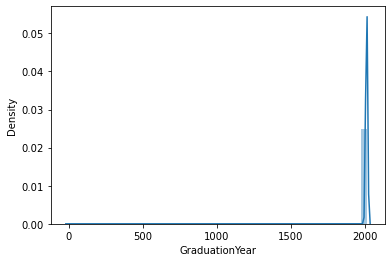

In [60]:
sns.distplot(data1["GraduationYear"])

##### GraduationYear showing distribution with left skewness.

<AxesSubplot:xlabel='GraduationYear'>

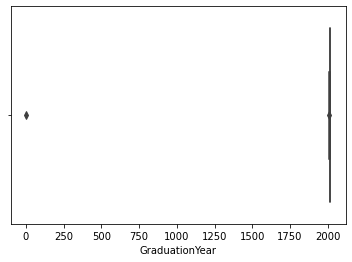

In [61]:
sns.boxplot(data1["GraduationYear"])

##### There are outliers present in the data. 

### Removing outliers

In [62]:
Q1 = np.percentile(data1['GraduationYear'], 25)
Q3 = np.percentile(data1['GraduationYear'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [63]:
data1['GraduationYear'] = data1['GraduationYear'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='GraduationYear'>

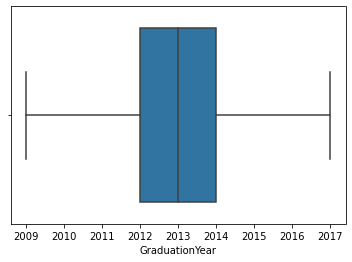

In [64]:
sns.boxplot(data1["GraduationYear"])

##### The above graph is after removing the outliers from the GraduationYear data.

### English 

<AxesSubplot:xlabel='English', ylabel='Density'>

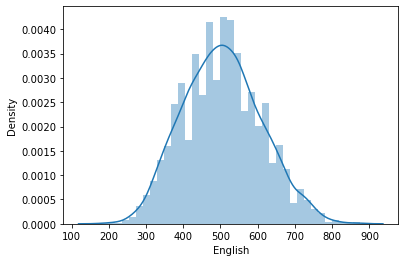

In [65]:
sns.distplot(data1["English"])

##### English  showing normal distribution

<AxesSubplot:xlabel='English'>

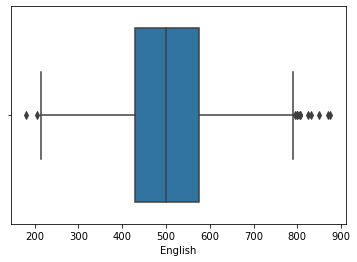

In [66]:
sns.boxplot(data1["English"])

##### English  having outliers present in the data.

### Removing outliers

In [67]:
Q1 = np.percentile(data1['English'], 25)
Q3 = np.percentile(data1['English'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [68]:
data1['English'] = data1['English'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='English'>

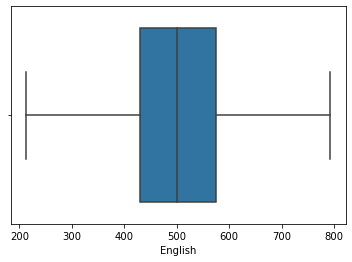

In [69]:
sns.boxplot(data1['English'])

###### The above plot is after removing the outliersfrom the English

### Logical

<AxesSubplot:xlabel='Logical', ylabel='Density'>

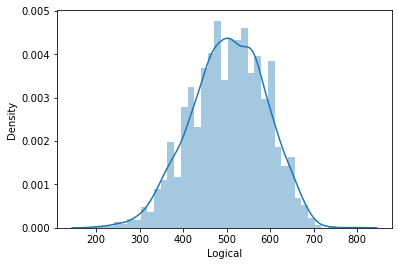

In [70]:
sns.distplot(data1["Logical"])

##### The above graph showing normal distribution

<AxesSubplot:xlabel='Logical'>

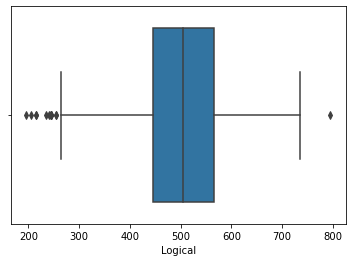

In [71]:
sns.boxplot(data1["Logical"])

###### There are outliers present in the Logical data.

### Removing outliers

In [72]:
Q1 = np.percentile(data1['Logical'], 25)
Q3 = np.percentile(data1['Logical'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [73]:
data1['Logical'] = data1['Logical'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='Logical'>

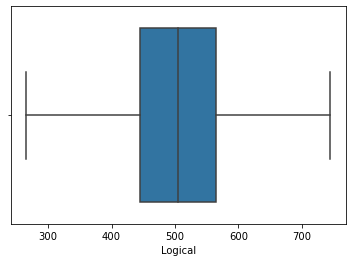

In [74]:
sns.boxplot(data1["Logical"])

##### The above plot is after removal outliers from the Logical data

### Quant

<AxesSubplot:xlabel='Quant', ylabel='Density'>

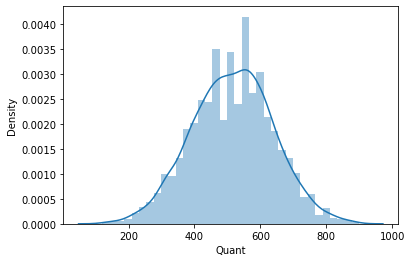

In [75]:
sns.distplot(data1["Quant"])

##### Quant plot showing normal distribution

<AxesSubplot:xlabel='Quant'>

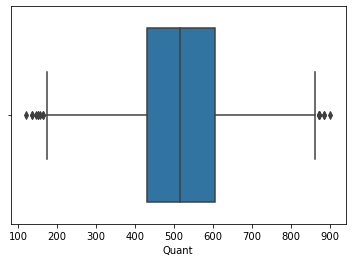

In [76]:
sns.boxplot(data1['Quant'])

##### Quant having outliers present in the data.

### Removing outliers

In [77]:
Q1 = np.percentile(data1['Quant'], 25)
Q3 = np.percentile(data1['Quant'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [78]:
data1['Quant'] = data1['Quant'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='Quant'>

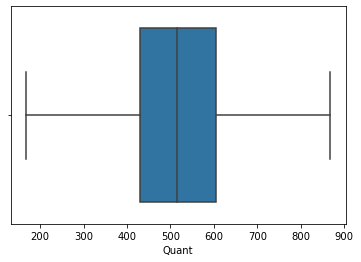

In [79]:
sns.boxplot(data1["Quant"])

##### The above plot is after removing outliers from Quant

### Domain 

<AxesSubplot:xlabel='Domain', ylabel='Density'>

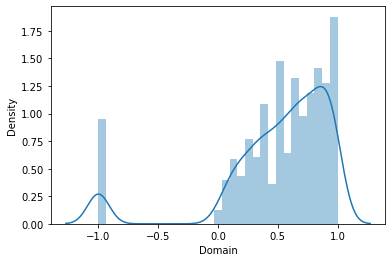

In [80]:
sns.distplot(data1["Domain"])

##### The plot not showing normal distribution

<AxesSubplot:xlabel='Domain'>

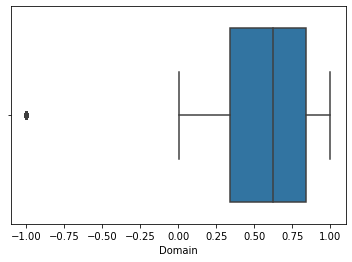

In [81]:
sns.boxplot(data1["Domain"])

##### Domain  having outliers present in the data.

### Removing outliers

In [82]:
Q1 = np.percentile(data1['Domain'], 25)
Q3 = np.percentile(data1['Domain'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [83]:
data1['Domain'] = data1['Domain'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='Domain'>

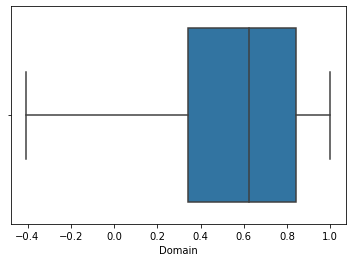

In [84]:
sns.boxplot(data1["Domain"])

##### The above plot is after removing the outliers in the Domain data.  

### ComputerProgramming

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Density'>

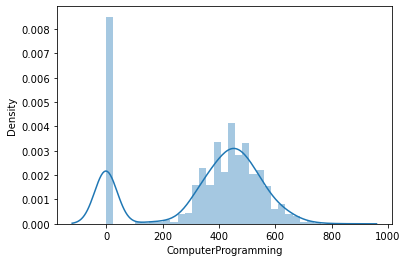

In [85]:
sns.distplot(data1["ComputerProgramming"])

#### The above plot showing bimodal distribution. 

<AxesSubplot:xlabel='ComputerProgramming'>

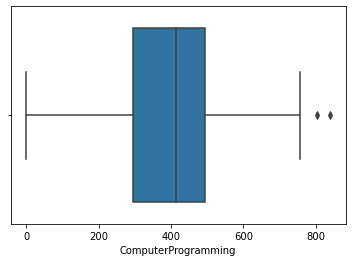

In [86]:
sns.boxplot(data1["ComputerProgramming"])

#### From the above graph we can observe that outliers are present in the ComputerProgramming data. 

### Removing outliers

In [87]:
Q1 = np.percentile(data1['ComputerProgramming'], 25)
Q3 = np.percentile(data1['ComputerProgramming'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [88]:
data1['ComputerProgramming'] = data1['ComputerProgramming'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='ComputerProgramming'>

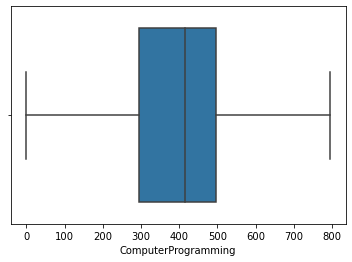

In [89]:
sns.boxplot(data1["ComputerProgramming"])

#### The above plot is after removing outiers from the ComputerProgramming data

### ElectronicsAndSemicon

<AxesSubplot:xlabel='ElectronicsAndSemicon', ylabel='Density'>

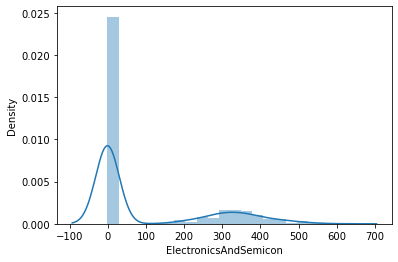

In [90]:
sns.distplot(data1["ElectronicsAndSemicon"])

###### The above plot is not showing normal disstribution.

<AxesSubplot:xlabel='ElectronicsAndSemicon'>

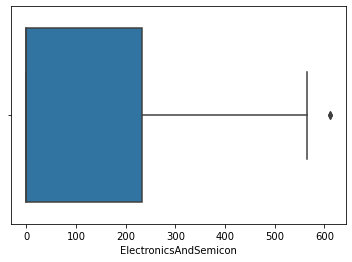

In [91]:
sns.boxplot(data1["ElectronicsAndSemicon"])

##### outlers are present in the ElectronicsAndSemicon data

### Removing outliers

In [92]:
Q1 = np.percentile(data1['ElectronicsAndSemicon'], 25)
Q3 = np.percentile(data1['ElectronicsAndSemicon'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [93]:
data1['ElectronicsAndSemicon'] = data1['ElectronicsAndSemicon'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='ElectronicsAndSemicon'>

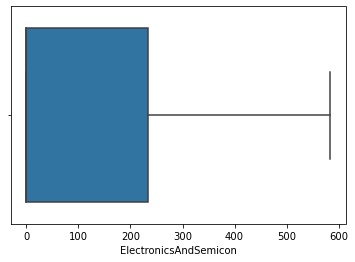

In [94]:
sns.boxplot(data1["ElectronicsAndSemicon"])

##### The above plot is after removing outliers from the ElectronicsAndSemicon data

### ComputerScience

<AxesSubplot:xlabel='ComputerScience', ylabel='Density'>

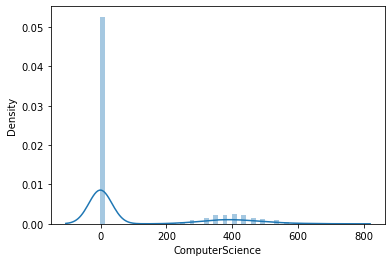

In [95]:
sns.distplot(data1["ComputerScience"])

#### The above plot not showing the normal distribution.

<AxesSubplot:xlabel='ComputerScience'>

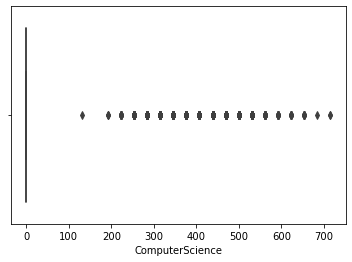

In [96]:
sns.boxplot(data1["ComputerScience"])

#### There are more number of outliers present in the ComputerScience data

### Removing outliers

In [97]:
Q1 = np.percentile(data1['ComputerScience'], 25)
Q3 = np.percentile(data1['ComputerScience'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [98]:
data1['ComputerScience'] = data1['ComputerScience'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='ComputerScience'>

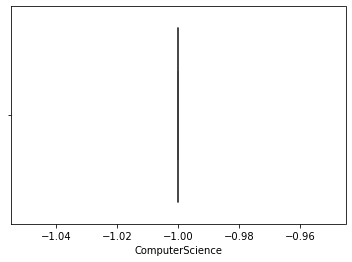

In [99]:
sns.boxplot(data1["ComputerScience"])

##### Outliers from the ComputerScience data are now removed.

### MechanicalEngg

<AxesSubplot:xlabel='MechanicalEngg', ylabel='Density'>

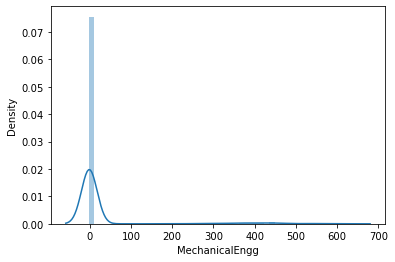

In [100]:
sns.distplot(data1["MechanicalEngg"])

##### The above plot is not showing normal distribution.

<AxesSubplot:xlabel='MechanicalEngg'>

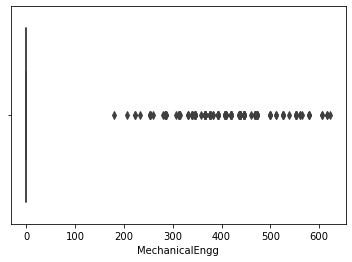

In [101]:
sns.boxplot(data1["MechanicalEngg"])

##### The above plot is showing outiers in the data.

### Removing outliers

In [102]:
Q1 = np.percentile(data1['MechanicalEngg'], 25)
Q3 = np.percentile(data1['MechanicalEngg'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [103]:
data1['MechanicalEngg'] = data1['MechanicalEngg'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='MechanicalEngg'>

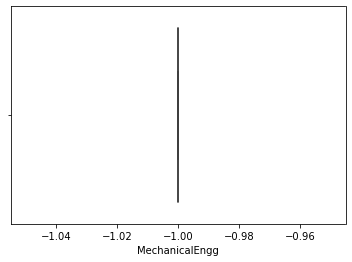

In [104]:
sns.boxplot(data1["MechanicalEngg"])

##### The above plot is after removing outliers from the data. 

### ElectricalEngg

<AxesSubplot:xlabel='ElectricalEngg', ylabel='Density'>

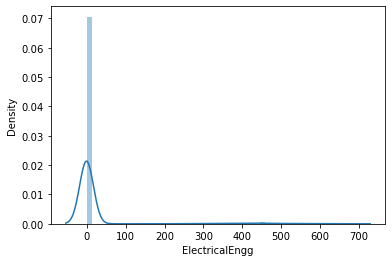

In [105]:
sns.distplot(data1["ElectricalEngg"])

#### The above plot showing normal distribution with skewness.

<AxesSubplot:xlabel='ElectricalEngg'>

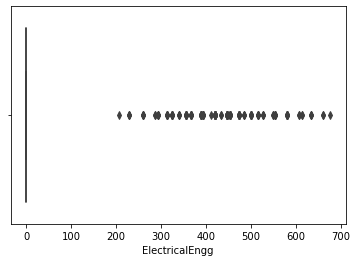

In [106]:
sns.boxplot(data1["ElectricalEngg"])

#### there are more number of outliers present in the ElectricalEngg data 

### Removing outliers

In [107]:
Q1 = np.percentile(data1['ElectricalEngg'], 25)
Q3 = np.percentile(data1['ElectricalEngg'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [108]:
data1['ElectricalEngg'] = data1['ElectricalEngg'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='ElectricalEngg'>

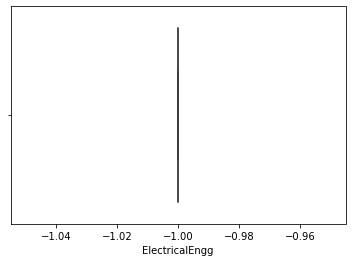

In [109]:
sns.boxplot(data1["ElectricalEngg"])

##### The above graph is after removing outliers from the ElectricalEngg data

### TelecomEngg

<AxesSubplot:xlabel='TelecomEngg', ylabel='Density'>

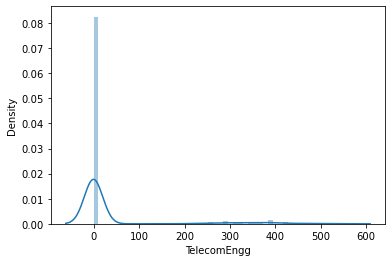

In [110]:
sns.distplot(data1["TelecomEngg"])

##### The above plot is showing normal distribution with skewness.

<AxesSubplot:xlabel='TelecomEngg'>

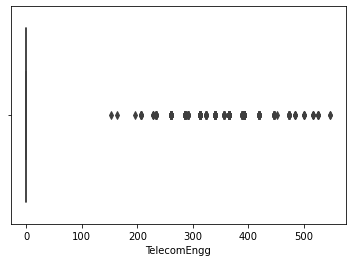

In [111]:
sns.boxplot(data1['TelecomEngg'])

#### There are more number of outliers present in the data

### Removing outliers

In [112]:
Q1 = np.percentile(data1['TelecomEngg'], 25)
Q3 = np.percentile(data1['TelecomEngg'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [113]:
data1['TelecomEngg'] = data1['TelecomEngg'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='TelecomEngg'>

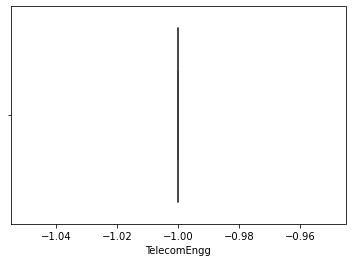

In [114]:
sns.boxplot(data1["TelecomEngg"])

#### The above graph is after removing outliers from the TelecomEngg data

### CivilEngg

<AxesSubplot:xlabel='CivilEngg', ylabel='Density'>

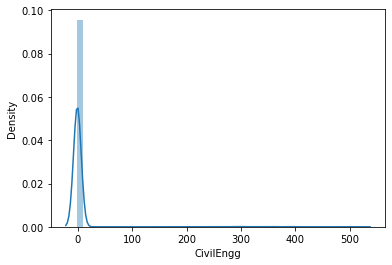

In [115]:
sns.distplot(data1["CivilEngg"])

#### showing normal distribution with skewness on right side.

<AxesSubplot:xlabel='CivilEngg'>

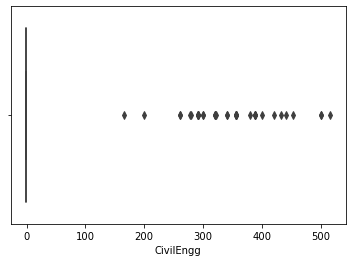

In [116]:
sns.boxplot(data1["CivilEngg"])

#### There are more number of outliers present in the CivilEngg data

### Removing outliers

In [117]:
Q1 = np.percentile(data1['CivilEngg'], 25)
Q3 = np.percentile(data1['CivilEngg'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [118]:
data1['CivilEngg'] = data1['CivilEngg'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='CivilEngg'>

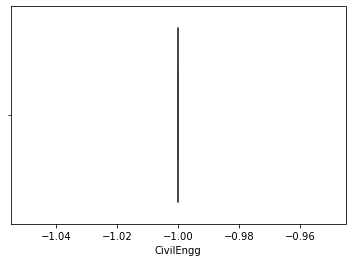

In [119]:
sns.boxplot(data1["CivilEngg"])

##### the above graph is after removing the outliers from the data.

### conscientiousness

<AxesSubplot:xlabel='conscientiousness', ylabel='Density'>

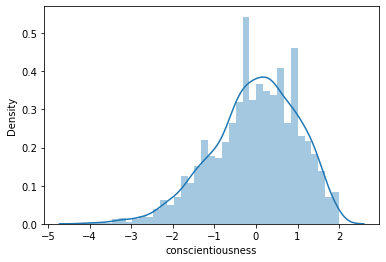

In [120]:
sns.distplot(data1["conscientiousness"])

#### Showing normal distribution with left skewness.  

<AxesSubplot:xlabel='conscientiousness'>

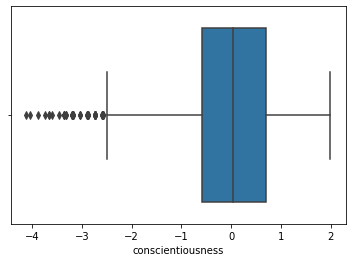

In [121]:
sns.boxplot(data1["conscientiousness"])

##### There are outliers present in the conscientiousness data

### Removing outliers

In [122]:
Q1 = np.percentile(data1['conscientiousness'], 25)
Q3 = np.percentile(data1['conscientiousness'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [123]:
data1['conscientiousness'] = data1['conscientiousness'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='conscientiousness'>

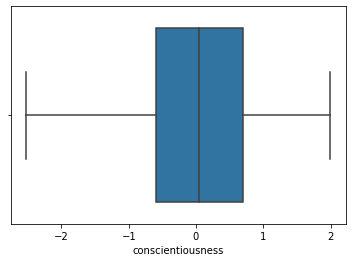

In [124]:
sns.boxplot(data1["conscientiousness"])

##### the above graph is after removal outliers from the conscientiousness data

### agreeableness

<AxesSubplot:xlabel='agreeableness', ylabel='Density'>

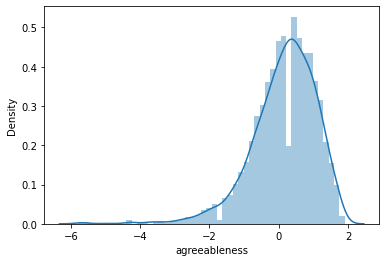

In [125]:
sns.distplot(data1["agreeableness"])

##### Showing normal distribution with left skewness.

<AxesSubplot:xlabel='agreeableness'>

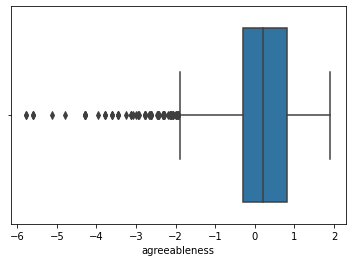

In [126]:
sns.boxplot(data1["agreeableness"])

#### there are outliers present in the agreeableness data

### Removing outliers

In [127]:
Q1 = np.percentile(data1['agreeableness'], 25)
Q3 = np.percentile(data1['agreeableness'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [128]:
data1['agreeableness'] = data1['agreeableness'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='agreeableness'>

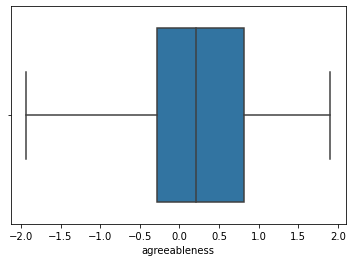

In [129]:
sns.boxplot(data1["agreeableness"])

##### The above graph is after removing outliers from the agreeableness data

### extraversion

<AxesSubplot:xlabel='extraversion', ylabel='Density'>

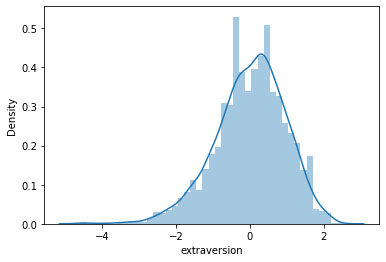

In [130]:
sns.distplot(data1["extraversion"])

#### Showing normal distribution with left skewness

<AxesSubplot:xlabel='extraversion'>

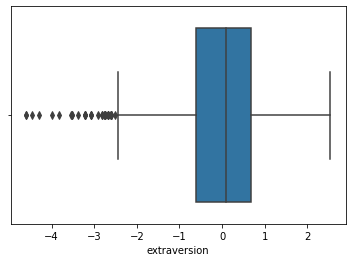

In [131]:
sns.boxplot(data1["extraversion"])

##### There are outliers present in the extraversion data

### Removing outliers

In [132]:
Q1 = np.percentile(data1['extraversion'], 25)
Q3 = np.percentile(data1['extraversion'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [133]:
data1['extraversion'] = data1['extraversion'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='extraversion'>

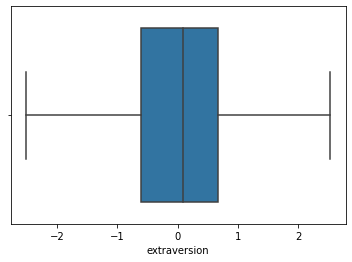

In [134]:
sns.boxplot(data1["extraversion"])

##### The above graph is after removing the outliers in the extraversion data. 

### nueroticism

<AxesSubplot:xlabel='nueroticism', ylabel='Density'>

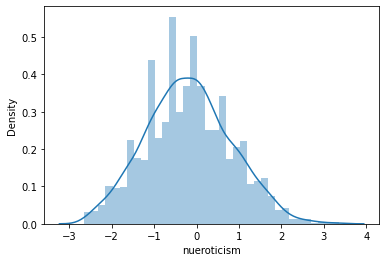

In [135]:
sns.distplot(data1["nueroticism"])

#### Showing normal distribution with some right skewness. 

<AxesSubplot:xlabel='nueroticism'>

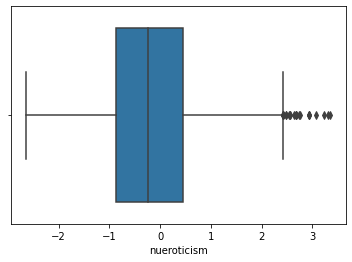

In [136]:
sns.boxplot(data1["nueroticism"])

#### There are outliers present in the nueroticism data.

### Removing outliers

In [137]:
Q1 = np.percentile(data1['nueroticism'], 25)
Q3 = np.percentile(data1['nueroticism'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [138]:
data1['nueroticism'] = data1['nueroticism'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='nueroticism'>

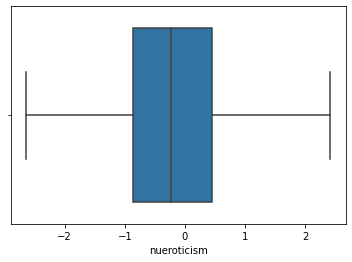

In [139]:
sns.boxplot(data1['nueroticism'])

### The above plot is after removing the outliers from the nueroticism data

### openess_to_experience 

<AxesSubplot:xlabel='openess_to_experience', ylabel='Density'>

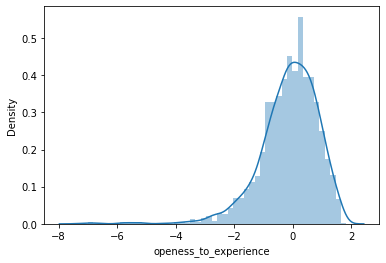

In [141]:
sns.distplot(data1["openess_to_experience"])

#### Showing normal distribution with left skewness.

<AxesSubplot:xlabel='openess_to_experience'>

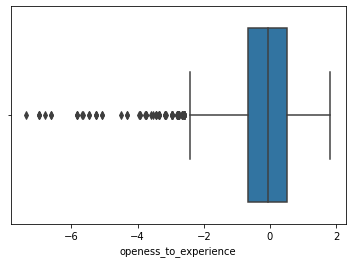

In [143]:
sns.boxplot(data1["openess_to_experience"])

##### There are more number of outliers present in the data

#### Removing outliers

In [144]:
Q1 = np.percentile(data1['openess_to_experience'], 25)
Q3 = np.percentile(data1['openess_to_experience'],75)
IQR = Q3 - Q1
IQR_25 = Q1 - 1.5*IQR
IQR_75 = Q3 + 1.5*IQR

In [145]:
data1['openess_to_experience'] = data1['openess_to_experience'].apply(lambda x : Q1-1.5*IQR if x < (Q1-1.5*IQR) else (Q3+1.5*IQR if x>(Q3+1.5*IQR) else x))

<AxesSubplot:xlabel='openess_to_experience'>

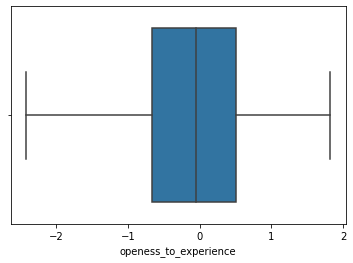

In [146]:
sns.boxplot(data1["openess_to_experience"])

##### The above plot is after removing the outliers from the openess_to_experience data

# Bivariate Analysis

### "Salary" vs "Designation"

In [218]:
df = data1.groupby(["Designation","Salary"])["Salary"].count().sort_values(ascending=False).head(15)

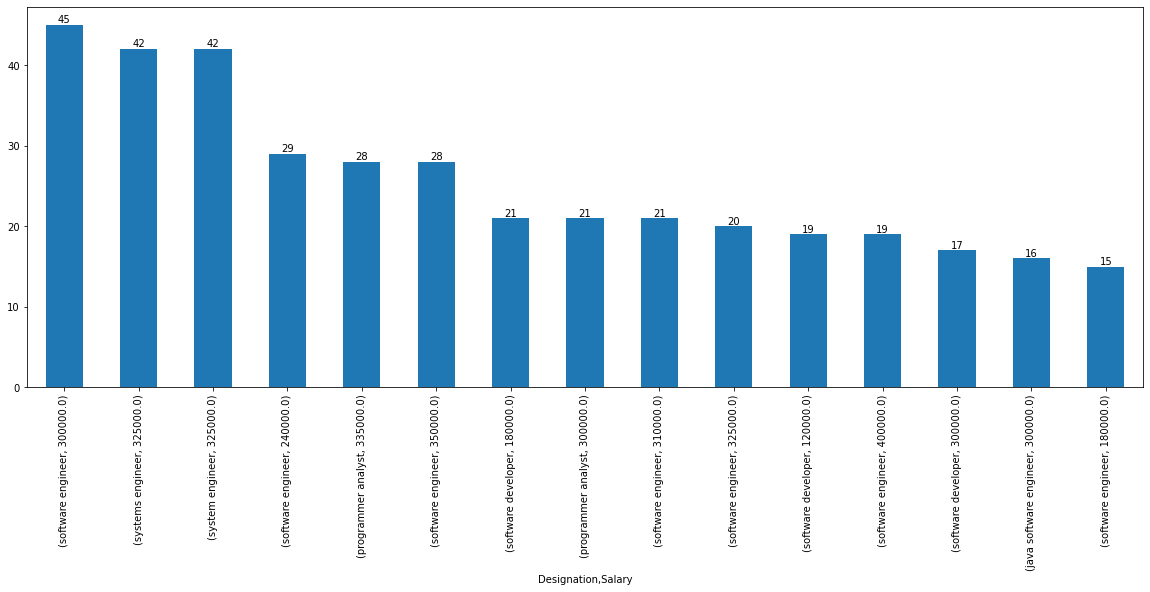

In [219]:
ax = df.plot(x='Designation', y='Salary',kind='bar',figsize=(20,7))
#plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

#### The above graph showing the more frequent designatons with corresponding salaries. Software engineer designation with 30 lakhs salary is having the more candidates.

In [223]:
data1 = data[data["JobCity"] != -1]

In [226]:
df = data1.groupby(["JobCity","Salary"])["JobCity"].count().sort_values(ascending=False).head(15)

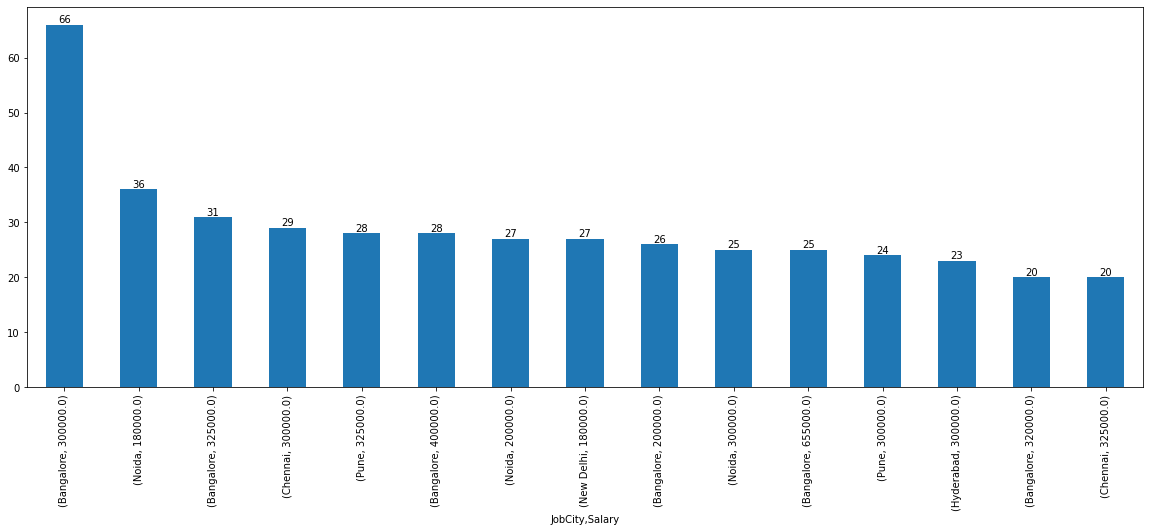

In [227]:
ax = df.plot(x='JobCity', y='Salary',kind='bar',figsize=(20,7))
#plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

##### 66 candidates are in Bangalore city with salary of 30 lakhs.Thsese are highest number of candidates with salary of 30 lakhs belongs to the JOBcity

In [228]:
df = data1.groupby(["Degree","Salary"])["Degree"].count().sort_values(ascending=False).head(15)

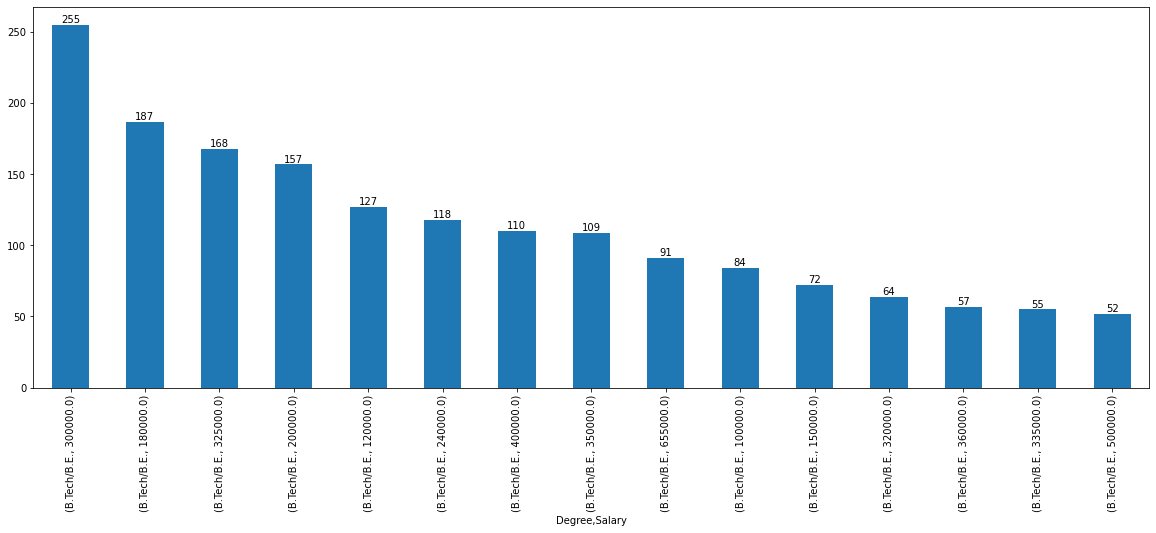

In [229]:
ax = df.plot(x='Degree', y='Salary',kind='bar',figsize=(20,7))
#plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

#### There are majaority of 255 candidates having B.Tech degree with salary of 30 lakhs. And we can observe the plot for the top 15 Dgrees with corresponding salaries.

### 'Salary' vs '10percentage'

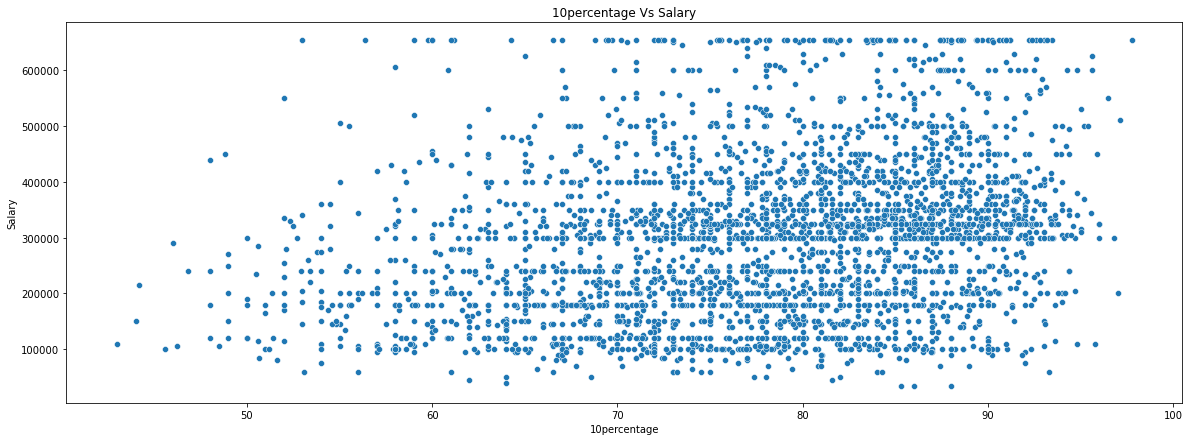

In [283]:
plt.figure(figsize=(20,7))
sns.scatterplot(x='10percentage', y='Salary', data=data1)
plt.title('10percentage Vs Salary')
plt.show()

##### Majarotiy candidates 10th percentages are betwween 50 and 95. All are having different price ranges.
* 10percentage Not showing linear relationship with salary

### 'Salary' vs '12graduation'

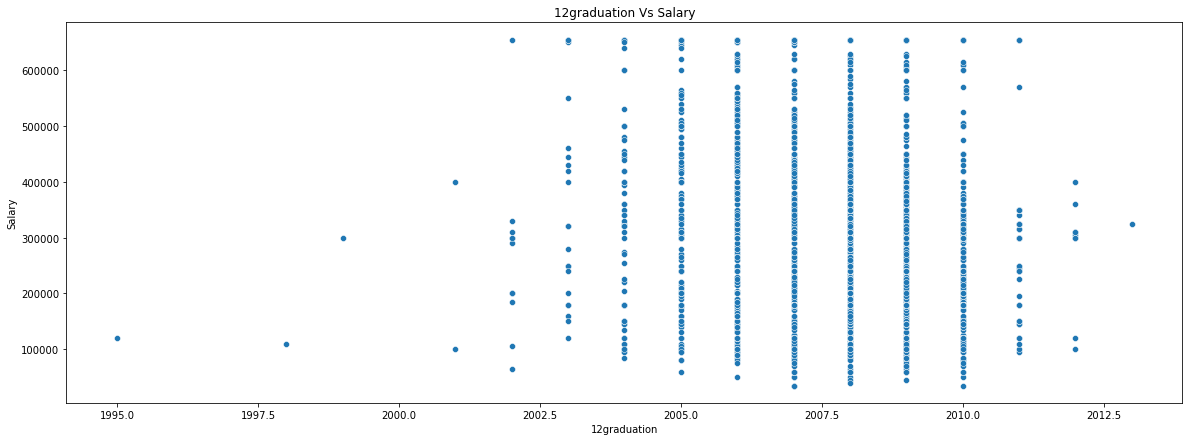

In [287]:
plt.figure(figsize=(20,7))
sns.scatterplot(x='12graduation', y='Salary', data=data1)
plt.title('12graduation Vs Salary')
plt.show()

##### Majority candidates are between 2002 and 2012 . They are having different salary ranges.
* Salary not showing linear relationship with 12graduation. 

### Specialization vs Salary

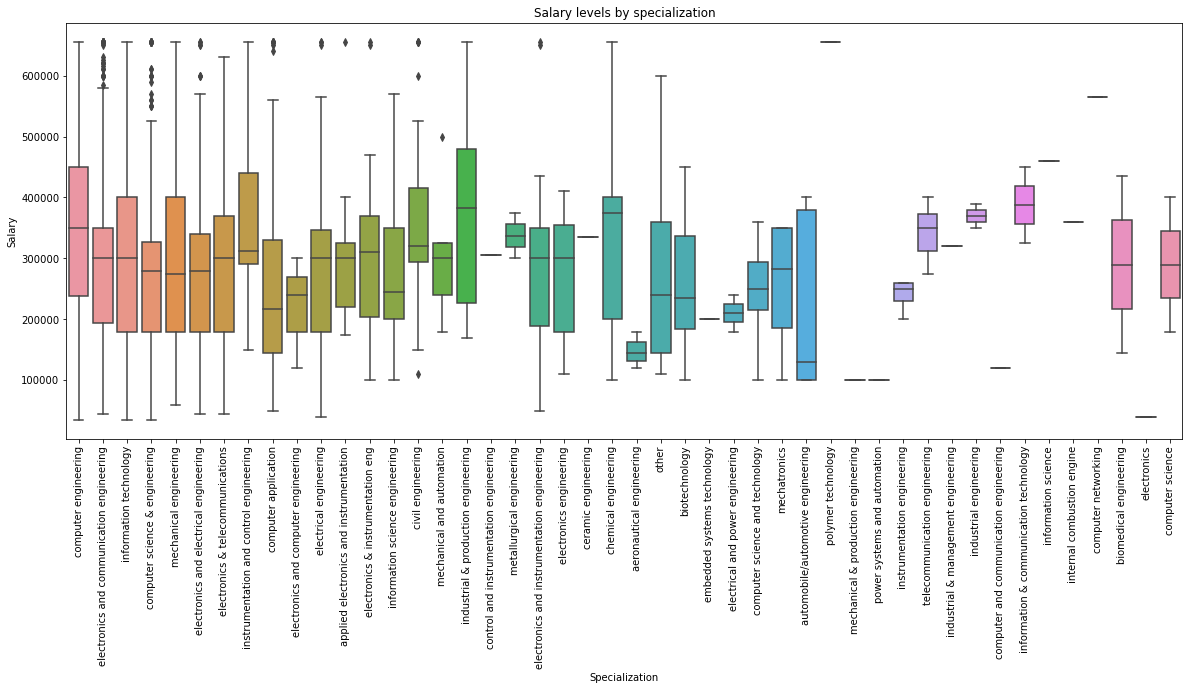

In [290]:
fig, ax = plt.subplots(figsize=(20,7))
sns.boxplot(data=data, x='Specialization', y='Salary')
plt.title('Salary levels by specialization')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.subplots_adjust(top=0.95)
plt.show()

####  If we observe here at each box outliers can be seen for each specialization and considers are highest salary which away from average salary.
#### It is observed that Computer Science department has many outliers indicating higher salaries are earned by those of Computer Science specializaton

### Gender Vs Salary

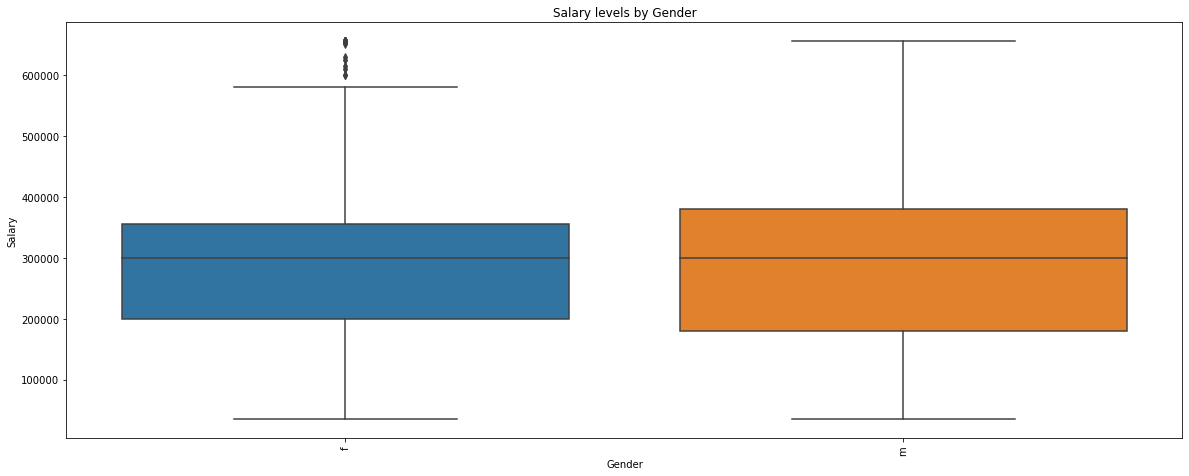

In [296]:
fig, ax = plt.subplots(figsize=(20,7))
sns.boxplot(data=data, x='Gender', y='Salary')
plt.title('Salary levels by Gender')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.subplots_adjust(top=0.95)
plt.show()

#### From the graph we can observe that male candidates are having high salary than the female candidates.
#### The avarage salary for the male and female candidates are same. 

## 5. Research Question :
#### Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

### Claiming

### Null Hypothesis : H0 : H0 >= 3L
### Alternative Hyo : H1 : H1 < 3 L

In [298]:
(data['DOJ'].dt.year == data['GraduationYear']).value_counts()

True     2289
False    1709
dtype: int64

In [300]:
data2 = data[(data.Specialization=='computer science & engineering') & (data['DOJ'].dt.year==data['GraduationYear']) & 
             ((data.Designation=='software engineer')  | (data.Designation=='programmer analyst') | 
              (data.Designation=='associate software engineer'))] 
data2

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
24,963123,335000.0,2014-06-01,2015-06-01 00:00:00,programmer analyst,Hyderabad,m,1993-06-28,88.00,state board,...,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.99500,-0.6692
31,1094324,340000.0,2014-08-01,2015-04-01 00:00:00,software engineer,Bangalore,m,1992-10-23,77.20,state board,...,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889
48,338428,390000.0,2013-09-01,present,software engineer,Bangalore,m,1991-02-28,86.60,cbse,...,346,-1,-1,-1,-1,-2.5039,0.0328,0.3817,0.26793,0.5024
55,989860,250000.0,2014-08-01,present,software engineer,Mangalore,m,1992-02-13,90.80,state board,...,376,-1,-1,-1,-1,-0.3027,0.7119,-0.2974,1.16010,-0.4776
115,815219,330000.0,2013-12-01,2015-04-01 00:00:00,software engineer,Chennai,m,1992-01-13,76.17,state board,...,-1,-1,-1,-1,-1,0.4155,-0.7866,-1.2196,1.16010,-1.8189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,1089624,240000.0,2014-02-01,present,software engineer,Mumbai,f,1991-09-08,73.80,cbse,...,500,-1,-1,-1,-1,0.1282,0.5454,0.3174,-0.23440,-0.2859
3880,1233727,300000.0,2015-06-01,present,programmer analyst,Gurgaon,m,1994-06-30,81.00,cbse,...,592,-1,-1,-1,-1,-1.3080,0.2124,1.3933,2.93490,0.4805
3881,982135,600000.0,2014-01-01,present,software engineer,Bangalore,m,1992-01-31,80.40,jharkhand acedemic council,...,530,-1,-1,-1,-1,-0.3027,0.0459,0.3174,-1.12180,-0.0943
3939,716325,100000.0,2013-07-01,2014-12-01 00:00:00,software engineer,Hyderabad,m,1992-07-05,65.00,state board,...,-1,-1,-1,-1,-1,-0.3027,-1.9521,-0.6048,1.16010,-1.8189


In [303]:
data2[['DOJ','GraduationYear']]

,DOJ,GraduationYear
24,2014-06-01,2014
31,2014-08-01,2014
48,2013-09-01,2013
55,2014-08-01,2014
115,2013-12-01,2013
...,...,...
3818,2014-02-01,2014
3880,2015-06-01,2015
3881,2014-01-01,2014
3939,2013-07-01,2013


### Observation :
##### Above all cell is check both graduation year and date of joining in a company should be same which is computer science and engineering who got placed in roles of software engineer, programmer analyst and associate software engineer

### Describing salary

In [304]:
print('Minimum salary :',data1['Salary'].min())
print('Maximum salary :',data1['Salary'].max())
print('Average salary :',round(data1['Salary'].mean()))
print("Median salary  :",round(data1['Salary'].median()))

Minimum salary : 70000.0
Maximum salary : 655000.0
Average salary : 342170
Median salary  : 320000


### Defining the sample and population parameters

In [305]:
sample_size = 106
sample_mean = 349198
pop_mean = 300000
pop_std = 50000

### z_score for sampling distributions

In [306]:
def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

### Calculating the z-score

In [307]:
z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

10.130488233525568


### One Tail - Calculating the z-critical value

In [310]:
confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha)
print(z_critical)

1.6448536269514722


### Ploting the sampling distribution with rejection regions

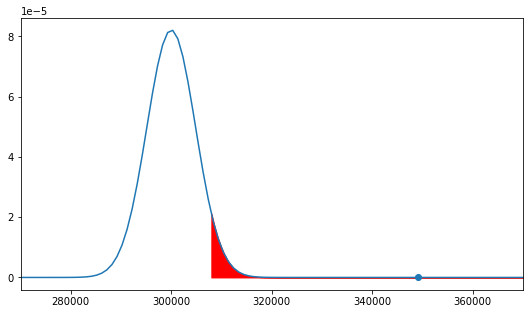

In [312]:
# Defining the x minimum and x maximum
x_min = 270000
x_max = 370000

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
plt.figure(figsize=(9,5))
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical value (Right tailed Test)
z_critical_right = pop_mean + (z_critical * std)

# Shading the right rejection region
x1 = np.linspace(z_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='red')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))
plt.show()

### Conclusion using z test

In [313]:
if(z > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


### Conclusion using p test

In [314]:
p_value = 1.0 - norm.cdf(np.abs(z))
print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0
Reject Null Hypothesis


In [315]:
print('Average salary :',round(data1['Salary'].mean()))
print("Median salary  :",round(data1['Salary'].median()))

Average salary : 342170
Median salary  : 320000


### Observation :
###### Here we are getting Reject Null Hypothesis means the salaries for freshers are getting average salaries 3.2L to 3.5L who had joined in computer science engineerning took jobs in software enginner, programmer analyst and associate software enginner.
###### Baesd on the above statistics, this claim by times of India is False.

### 6. Research Question :
##### Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

<AxesSubplot:xlabel='Gender', ylabel='count'>

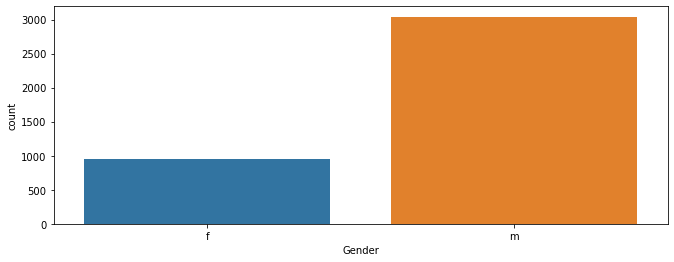

In [326]:
plt.figure(figsize=(11,4))
sns.countplot(data["Gender"])

In [327]:
num_males = data['Gender'].where(data['Gender'] == 'm').count()
num_females = data['Gender'].where(data['Gender'] == 'f').count()
print('Number of male candidates   : {}'.format(num_males))
print('Number of female candidates : {}'.format(num_females))
print('Male to Female ratio        : {:.2f}'.format(num_males/num_females))

Number of male candidates   : 3041
Number of female candidates : 957
Male to Female ratio        : 3.18


### Boxplot visualization of salary levels by gender

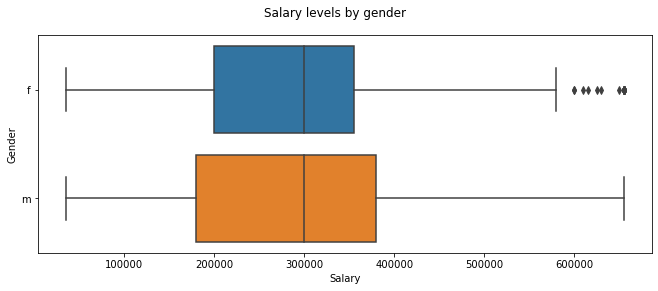

In [330]:
plt.figure(figsize=(11,4))
sns.boxplot(x='Salary', y = 'Gender', data=data)
plt.suptitle('Salary levels by gender')
plt.show()

### Gender vs Specialization

In [333]:
data.groupby(data['Gender'])["Specialization"].count()

Gender
f     957
m    3041
Name: Specialization, dtype: int64

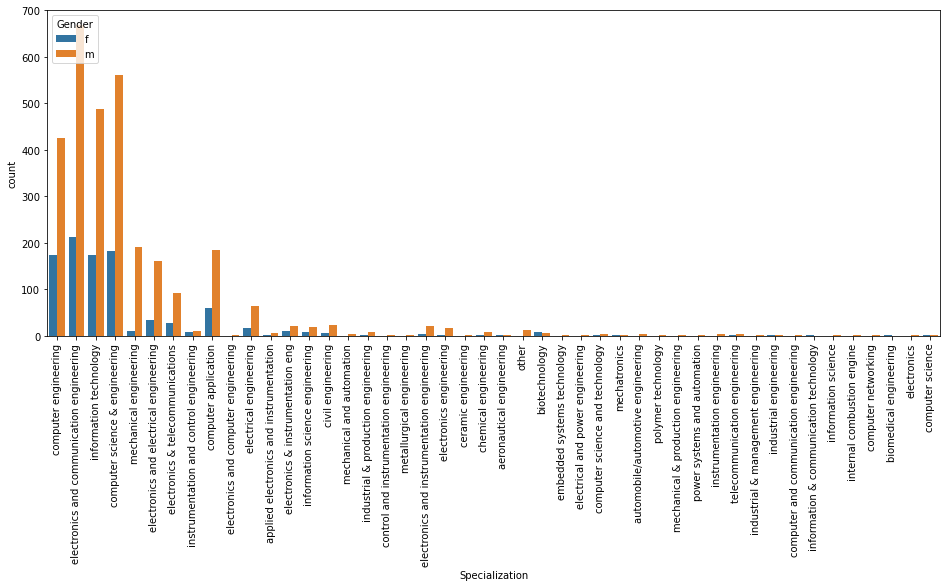

In [334]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(data=data, x='Specialization', hue='Gender')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


#### More female candidates are choosing the computer science engineering, information techonology and electronics and communication engineering.
#### Male candidates are high in number compare to female and involving in all of the specializations compare to females.

................................................. END OF TASK ............................................................   